## Part 1.4 - Batch normalization
#### *Pol Roca Llaberia*

In this experiment we will analyze the improvement in performance that a batch normalization layer can bring to the model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
N = 300

In [ ]:
X_train = X_train[:N]
y_train = y_train[:N]
X_test = X_test[:2500]
y_test = y_test[:2500]

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
np.unique(y_test, return_counts=True)

(300, 28, 28, 1)
(2500, 28, 28, 1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([219, 287, 276, 254, 275, 221, 225, 257, 242, 244]))

In [ ]:
def build_model_baseline():
    model = models.Sequential(name='baseline')
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

def build_model_batchnorm():
    model = models.Sequential(name='batchnorm')
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

In [ ]:
model_baseline = build_model_baseline()
model_batchnorm = build_model_batchnorm()

print(model_baseline.summary(), '\n\n')
print(model_batchnorm.summary())

Model: "baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                28810     
Total params: 29,330
Trainable params: 29,330
Non-trainable params: 0
_________________________________________________________________
None 


Model: "batchnorm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 20)        520       
___________________________

In [ ]:
 for model in [model_baseline, model_batchnorm]:
    model.compile(optimizer='SGD',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [ ]:
histories = []
metrics = []
epochs = 50

for model in [model_baseline, model_batchnorm]:
    history = model.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        verbose=1)
    histories.append(history.history)
    metrics.append(model.evaluate(X_test,  y_test))

Epoch 1/50
10/10 [==============================] - 32s 41ms/step - loss: 735.9220 - accuracy: 0.0717 - val_loss: 2.2988 - val_accuracy: 0.1316
Epoch 2/50
10/10 [==============================] - 0s 20ms/step - loss: 2.3020 - accuracy: 0.1078 - val_loss: 2.2988 - val_accuracy: 0.1352
Epoch 3/50
10/10 [==============================] - 0s 20ms/step - loss: 2.2973 - accuracy: 0.1003 - val_loss: 2.3018 - val_accuracy: 0.1292
Epoch 4/50
10/10 [==============================] - 0s 20ms/step - loss: 2.2911 - accuracy: 0.1271 - val_loss: 2.2951 - val_accuracy: 0.1392
Epoch 5/50
10/10 [==============================] - 0s 19ms/step - loss: 2.2564 - accuracy: 0.1720 - val_loss: 2.2962 - val_accuracy: 0.1300
Epoch 6/50
10/10 [==============================] - 0s 19ms/step - loss: 2.2363 - accuracy: 0.1833 - val_loss: 2.2472 - val_accuracy: 0.2316
Epoch 7/50
10/10 [==============================] - 0s 20ms/step - loss: 1.9642 - accuracy: 0.3353 - val_loss: 2.0769 - val_accuracy: 0.3228
Epoch 8/50

In [ ]:
for loss, acc in np.round(metrics, 2):
    print(f'loss: {loss:.2f} accuracy: {acc:.2f}')

loss: 4.82 accuracy: 0.60
loss: 0.87 accuracy: 0.77


In [ ]:
def plot_curves(history, axes, title=''):
    # plot accuracy
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1, len(acc)+1)

    ax = axes[0]
    ax.plot(epochs, acc, 'b', label='Training Acc')
    ax.plot(epochs, val_acc, 'r', label='Validation Acc')
    ax.set_title('Accuracy curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.grid(alpha=0.4)
    ax.legend()

    # plot validation loss
    loss = history['loss']
    val_loss = history['val_loss']

    ax = axes[1]
    ax.plot(epochs, loss, 'b', label='Training loss')
    ax.plot(epochs, val_loss, 'r', label='Validation loss')
    ax.set_title('Loss curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid(alpha=0.4)
    ax.legend()

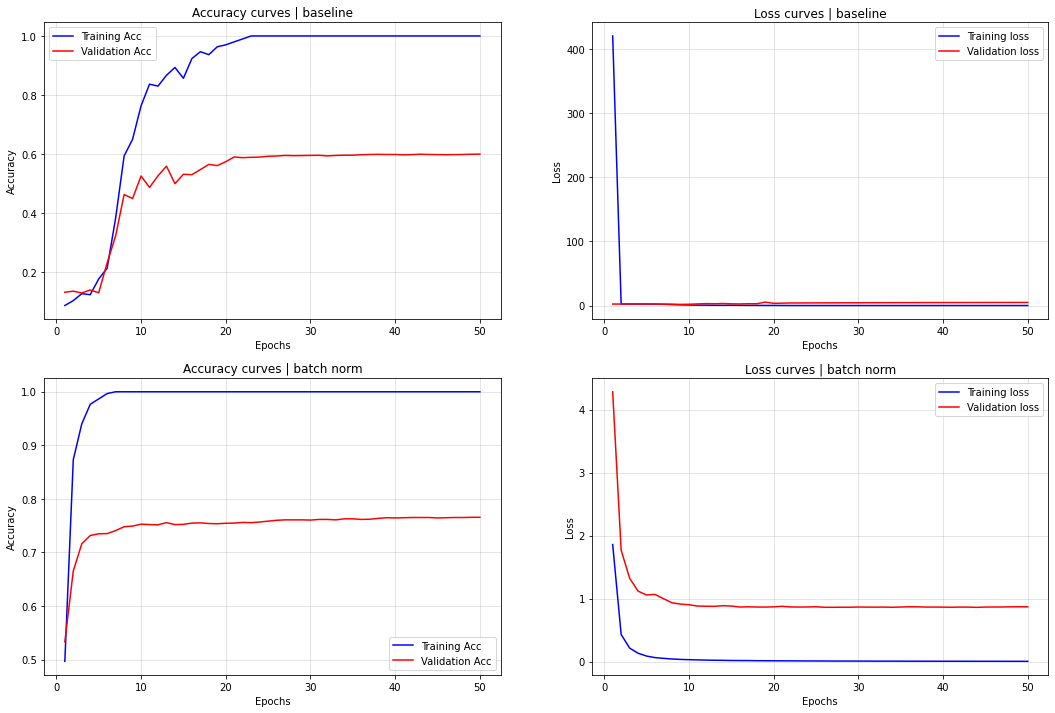

In [ ]:
fig, axes = plt.subplots(len(histories), 2, figsize=(18, 6*len(histories)))

plot_curves(histories[0], axes[0], 'baseline')
plot_curves(histories[1], axes[1], 'batch norm')

plt.show()

### Observations

As seen in the plots, the batch normalization layer has made the model approach the minimum more smoothly, while the accuracy was increased from 0.6 to 0.77. Here, we can see similar results as in the previous experiment because both techniques are actually very similar. While in the previous case data was normalized at the beginning but not throughout the network, in this case data is normalized just after the first convolutional layer. My intuition tells me that the first layer, which acts as the feature extractor, is not affected as much as the last layer by the unnormalized data. Since in both cases the last layer receives data that has been normalized at least once, the final results are very close. In this case, however, the lines converged much faster than before.

---